This notebook has been written as part of the Linux Audio Conference 2020 in Bordeaux, France. Thanks to Thibaud Keller and others to make it possible. Due to the Corona Pandemic it ought to be online. The video for this workshop can be found at https://vimeo.com/480443886

## Using ICsound

In [1]:
%load_ext csoundmagics

In [2]:
cs = ICsound()

Csound engine started at slot#: 1.


In [3]:
help(cs)

Help on ICsound in module csoundmagics object:

class ICsound(ctcsound.Csound)
 |  ICsound(sr=44100, ksmps=32, nchnls=2, zerodbfs=1.0, dac='dac', adc='', port=0, bufferSize=0)
 |  
 |  Implement Andrés Cabrera's icsound module in csoundmagics.
 |  
 |  An ICsound object is a child of a ctcsound.Csound object. It is bound
 |  to a slot number. This slot number can be used to specify this ICsound
 |  object when calling a %csound or a %%csound magic command.
 |  
 |  Method resolution order:
 |      ICsound
 |      ctcsound.Csound
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |      Destroys an instance of Csound.
 |  
 |  __init__(self, sr=44100, ksmps=32, nchnls=2, zerodbfs=1.0, dac='dac', adc='', port=0, bufferSize=0)
 |      Create an instance of ICsound.
 |  
 |  channel(self, name)
 |      Read a value from a control channel.
 |  
 |  clearLog(self)
 |      Delete the messages in the csound message buffer.
 |  
 |  fillTable(self, num, arr)
 |      

In [4]:
%%csound
i0 = ftgen(1,0,32,21,6)

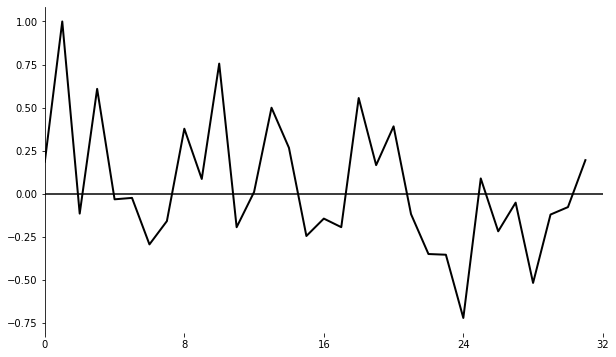

In [5]:
cs.plotTable(1)

In [6]:
cs.stopEngine()

In [7]:
del cs

## Using PySimpleGUI

In [8]:
import PySimpleGUI as sg

In [9]:
layout = [[sg.Input(key='INPUT')],
         [sg.Button('Read'), sg.Exit()]]

window = sg.Window('Please type',layout)

while True:
    event, values = window.read()
    print(event,values)
    if event==None or event=='Exit':
        break
        
window.close()

Read {'INPUT': 'hello LAC!'}
Read {'INPUT': 'hello LAC and everyone!'}
Exit {'INPUT': 'hello LAC and everyone!'}


## GUI to Csound

In [10]:
cs = ICsound()

Csound engine started at slot#: 2.


In [11]:
orc = """
instr 1
 kFreq = chnget:k("freq")
 aOut = poscil:a(.2,kFreq)
 out(aOut,aOut)
endin
schedule(1,0,-1)
"""
cs.sendCode(orc)

In [12]:
layout = [[sg.Slider(range=(500,1000),key='FREQ',enable_events=True)]]

window = sg.Window('Simple Slider',layout)

while True:
    event, values = window.read()
    if event is None:
        break
    else:
        cs.setControlChannel('freq',values['FREQ'])
        
window.close()

In [13]:
cs.stopEngine()

In [14]:
del cs

make it better!

In [15]:
#csound part
cs = ICsound()
orc = """
instr 1
 kFreq = chnget:k("freq")
 aOut = poscil:a(.2,kFreq)
 out(aOut,aOut)
endin
schedule(1,0,-1)
"""
cs.sendCode(orc)

#gui part
layout = [[sg.Slider(range=(500,1000),key='FREQ',enable_events=True)]]
window = sg.Window('Simple Slider',layout)
while True:
    event, values = window.read()
    if event is None:
        break
    else:
        cs.setControlChannel('freq',values['FREQ'])
        
#exit
window.close()
cs.stopEngine()
del cs

Csound engine started at slot#: 3.


### Another Example

In [18]:
cs = ICsound()
orc = """
instr Playback
 Sfile = chnget:S("file")
 aFile[] = diskin(Sfile,1,0,1)
 kFadeOut = linenr:k(1,0,1,.01)
 out(aFile*kFadeOut)
endin
"""
cs.sendCode(orc)

layout = [[sg.Text('Select Audio File, then Start/Stop Playback')],
         [sg.FileBrowse(key='FILE',enable_events=True), sg.Button('Start'), sg.Button('Stop')]]
window = sg.Window('',layout)
while True:
    event, values = window.read()
    if event is None:
        break
    cs.setStringChannel('file',values['FILE'])
    if event is 'Start':
        cs.sendScore('i "Playback" 0 -1')
    if event is 'Stop':
        cs.sendCode('schedule(-nstrnum("Playback"),0,0)')
                    
cs.stopEngine()
del cs
window.close()

Csound engine started at slot#: 5.


## Csound -> GUI

In [21]:
# csound start
cs = ICsound()
orc = """
instr 1
 kLine = randomi:k(-1,1,1,3)
 chnset(kLine,"line")
endin
"""
cs.sendCode(orc)
cs.sendScore('i 1 0 -1')

# GUI
layout = [[sg.Slider(range=(-1,1),
                    orientation='h',
                    key='LINE',
                    disable_number_display=True,
                    resolution=0.01)],
         [sg.Text(size=(6,1),
                 key='LINET',
                 text_color='black',
                 background_color='white',
                 justification='right',
                 font=('Courier',16,'bold'))]]

# window and event loop
window = sg.Window('Simple Csound to GUI Example',layout)
while True:
    event, values = window.read(timeout=100)
    if event is None:
        cs.sendScore('i -1 0 1')
        cs.stopEngine()
        del cs
        break
    else:
        window['LINE'].update(cs.channel('line')[0])
        window['LINET'].update('%+.3f' % cs.channel('line')[0])
window.close()

Csound engine started at slot#: 6.
